# Here I am taking a fundus image of a retina and trying to pop the abnormalities from the image so that I can segment them and the model is clearly able to detect them.

In [46]:
import os
import cv2
import matplotlib.pyplot as plt

In [114]:
path_fundus = "Disease Grading/Original Images/Train/Proliferative/"

In [115]:
fundus_images = os.listdir(path_fundus)

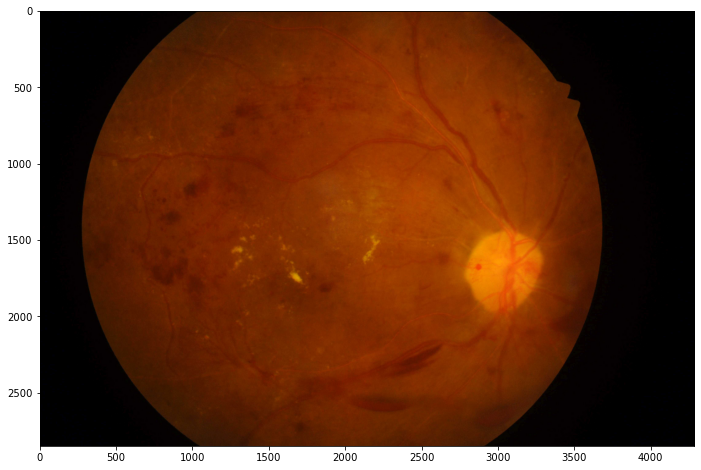

In [118]:
i = 5
plt.figure(figsize=(15,8))
image = cv2.imread(path_fundus+fundus_images[i])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [153]:
# The image_rgb contains 3 channels so lets plot all of them seperately 
image_rgb.shape

(2848, 4288, 3)

### Let's Plot all the 3 channels red, green and blue seperately.

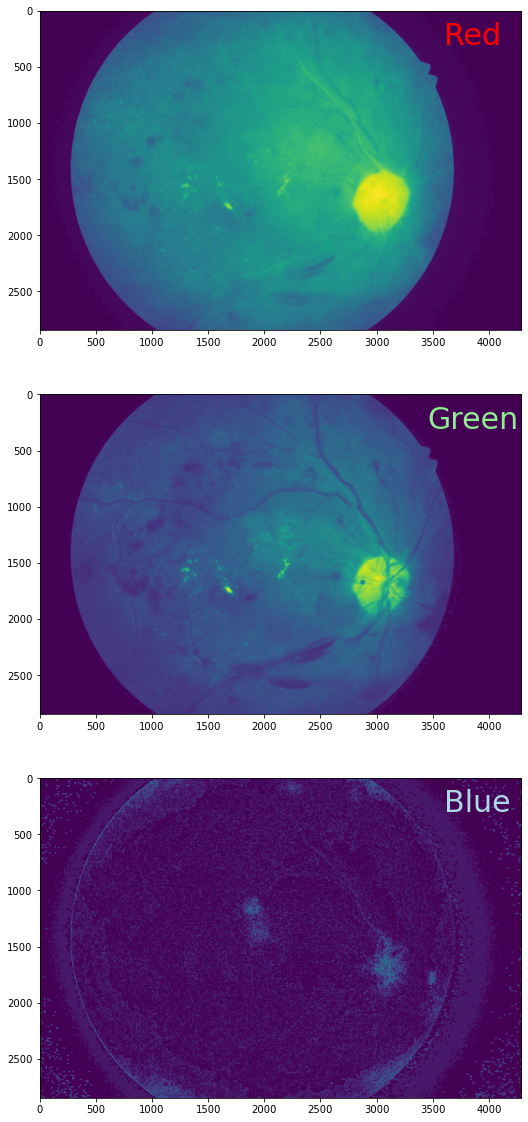

In [175]:
img_r = image_rgb[:,:,0]
img_g = image_rgb[:,:,1]
img_b = image_rgb[:,:,2]

fig, (axr, axg, axb) = plt.subplots(3,1, figsize=(20,20))
axr.text(3600,300,"Red",color="Red",size=30)
axr.imshow(img_r)
axg.text(3450,300,"Green",color="lightgreen",size=30)
axg.imshow(img_g)
axb.text(3600,300,"Blue",color="lightblue",size=30)
axb.imshow(img_b)

### As we can see among all the 3 channels, the Green channel pops/brightens the abnormalities in the retina image.
#### The green channel clearly shows the vessels, yellow dots, optic disk and other abnormalities.

## Now I have used the addWeighted function from cv2.

#### cv2.addWeighted(src1, alpha, src2, beta, gamma)
src1 = image_rgb

alpha = 4

src2 = cv2.GaussianBlur() # src2 should be same in size as src1. Here I have blurred the image using Low pass filter(GaussianBlur) so that image gets smoothen and all the sharp edges get popped out after adding it to src1.

beta = -4

gamma = 128

### It returns an image that is calculated as :
image_returned = src1 X alpha + src2 X beta + gamma

In [183]:
image_filtered = cv2.addWeighted(image_rgb, 4, cv2.GaussianBlur(image_rgb, (0,0) , 1000/10) ,-4 ,128)

In [125]:
fontFace = cv2.FONT_HERSHEY_SIMPLEX 
fontScale=3

### Plotting the filtered image along with denoting the abnormalities

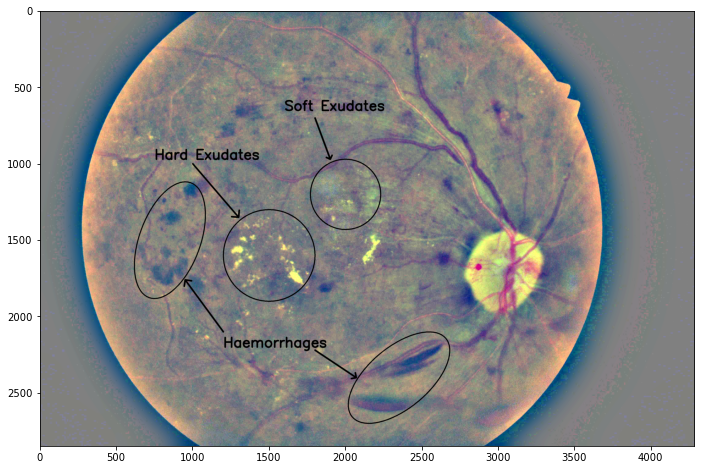

In [184]:
i = 5
plt.figure(figsize=(15,8))

# Marking exudates
cv2.circle(image_filtered, (1500,1600), 300, color=(0,0,0), thickness=5)
cv2.arrowedLine(image_filtered, (1000,1000), (1300,1350), color=(0,0,0), thickness=10)
cv2.putText(image_filtered, "Hard Exudates", (750,970), fontFace, fontScale, color=(0,0,0), thickness=10)

cv2.ellipse(image_filtered, (850,1500), (400,200), 110, 0, 360, (0,0,0), 5)
cv2.arrowedLine(image_filtered, (1200,2100), (950,1760), color=(0,0,0), thickness=10)
cv2.putText(image_filtered, "Haemorrhages", (1200,2200), fontFace, fontScale, color=(0,0,0), thickness=10)

cv2.ellipse(image_filtered, (2350,2400), (400,200), 140, 0, 360, (0,0,0), 5)
cv2.arrowedLine(image_filtered, (1800,2220), (2070,2400), color=(0,0,0), thickness=10)

cv2.circle(image_filtered, (2000,1200), 230, (0,0,0), 5)
cv2.arrowedLine(image_filtered, (1800,700), (1900,970), color=(0,0,0), thickness=10)
cv2.putText(image_filtered, "Soft Exudates", (1600,650), fontFace, fontScale, color=(0,0,0), thickness=10)

plt.imshow(image_filtered)
plt.show()

## Here the image generated above clearly distinguishes the abnormalities in the retina. All the Haemorrhages, Exudates and Microaneurysms(small dots near the blood vessels) are visible. This is a condition where the retinopathy is in its proliferative stage.